#                                  MAJOR PROJECT 

***Project Name:***
Artifical intelligence june major project 

*** Project Description ***

***problem statement: ***
Create a deep learning model to predict the different hand signs images .

### Steps to consider:

1. Normalize images by dividing pixels by 255 (if required)
2. Convert labels to categories (if required)
3. Reshape images so as to fit them to convolution
4. Build a CNN Architecture
5. Execute the model for appropriate number of epochs
6. Depict loss vs. val_loss on line chart.
7. Depict accuracy vs. val_accuracy on line chart.
8. Generate predictions on test_data.
9. Compute Confusion matrix and classification report

**Source**: https://en.wikipedia.org/wiki/Sign_language
**Dataset** – Download from
https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset

**Details of datasets:**
1. Image size: 64x64
2. Color space: Grayscale
3. File format: npy
4. Number of classes: 10 (Digits: 0-9)


***all required imports***

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix ,classification_report


**1. load the downloaded files**

In [4]:
all_X = np.load('X.npy')
all_Y = np.load('Y.npy')


**2. preprrocessing  the datasets**

In [5]:
test_size = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(all_X, all_Y, test_size=test_size, random_state=42)
# Reshape
X_train = X_train.reshape(-1, 64, 64,1)
X_test = X_test.reshape(-1, 64, 64, 1)

**3. Building a CNN Arichitecture**

In [6]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (64, 64, 1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 16)        0

In [8]:
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])

**4. Executing the model for 10 number of epochs**

In [9]:
epochs = 20  # for better result increase the epochs
batch_size = 250

SH = model.fit(X_train, Y_train,epochs=epochs, validation_data=(X_test,Y_test))

Epoch 1/20
55/55 [==============================] - 4s 59ms/step - loss: 2.3069 - accuracy: 0.0993 - val_loss: 2.3031 - val_accuracy: 0.1097
Epoch 2/20
55/55 [==============================] - 3s 55ms/step - loss: 2.3031 - accuracy: 0.0873 - val_loss: 2.3040 - val_accuracy: 0.0871
Epoch 3/20
55/55 [==============================] - 3s 55ms/step - loss: 2.3027 - accuracy: 0.1062 - val_loss: 2.3043 - val_accuracy: 0.1290
Epoch 4/20
55/55 [==============================] - 3s 55ms/step - loss: 2.3020 - accuracy: 0.1045 - val_loss: 2.3059 - val_accuracy: 0.1258
Epoch 5/20
55/55 [==============================] - 3s 55ms/step - loss: 2.3034 - accuracy: 0.1033 - val_loss: 2.3039 - val_accuracy: 0.0774
Epoch 6/20
55/55 [==============================] - 3s 55ms/step - loss: 2.3010 - accuracy: 0.1113 - val_loss: 2.3025 - val_accuracy: 0.0774
Epoch 7/20
55/55 [==============================] - 3s 56ms/step - loss: 2.1369 - accuracy: 0.2021 - val_loss: 1.6377 - val_accuracy: 0.5000
Epoch 8/20
55

In [10]:
scores=model.evaluate(X_test,Y_test)
print(scores)

10/10 [==============================] - 0s 17ms/step - loss: 0.1107 - accuracy: 0.9581
[0.11074981838464737, 0.9580644965171814]


**5. depict loss vs val_loss on line chart**

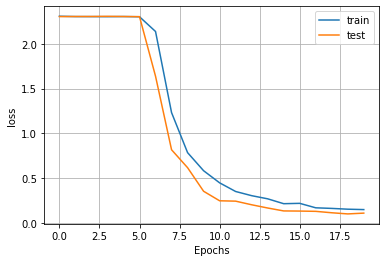

In [11]:
r1=pd.DataFrame(SH.history)
r1['Epochs']=SH.epoch
plt.plot(r1['Epochs'],r1['loss'],label='train')
plt.plot(r1['Epochs'],r1['val_loss'],label='test')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

**6. depict accuracy vy val_accuracy on line chart**

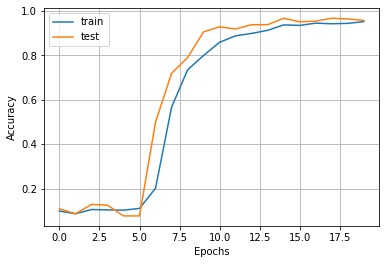

In [12]:
plt.plot(r1['Epochs'],r1['accuracy'],label='train')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

**7. generating predictions on test_data**

In [13]:
y_pred =model.predict(X_test,batch_size=128,verbose=0)

y_pred[1]

array([1.3433081e-08, 3.9396266e-08, 2.0708638e-05, 5.8635475e-08,
       2.4275640e-12, 2.5632281e-07, 3.3082604e-06, 1.3764577e-04,
       1.6774368e-12, 9.9983799e-01], dtype=float32)

In [14]:
Y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [15]:
import numpy as np 
sh1=np.argmax(Y_test,axis=1)
sh1[1]

9

**8. computing confusion matrix and classification report**

In [16]:
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

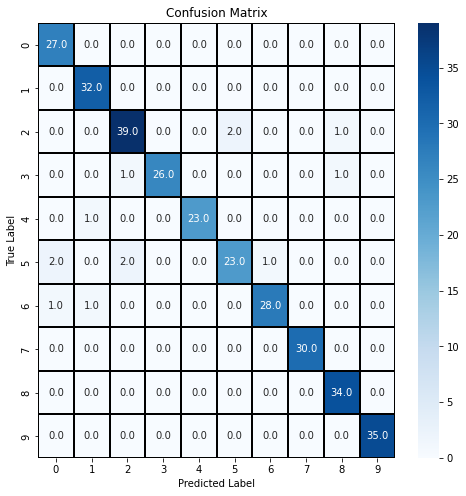

Train accuracy :  0.952625572681427
Train loss :  0.15017074346542358
Test accuracy :  0.9580644965171814
Test loss : 0.11074981838464737


In [26]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print('Train accuracy : ',SH.history['accuracy'][-1])
print('Train loss : ',SH.history['loss'][-1])
print('Test accuracy : ',SH.history['val_accuracy'][-1])
print('Test loss :',SH.history['val_loss'][-1])

In [27]:
print(classification_report(sh1,y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       0.94      1.00      0.97        32
           2       0.93      0.93      0.93        42
           3       1.00      0.93      0.96        28
           4       1.00      0.96      0.98        24
           5       0.92      0.82      0.87        28
           6       0.97      0.93      0.95        30
           7       1.00      1.00      1.00        30
           8       0.94      1.00      0.97        34
           9       1.00      1.00      1.00        35

    accuracy                           0.96       310
   macro avg       0.96      0.96      0.96       310
weighted avg       0.96      0.96      0.96       310



**Done by name**:- Thogaruchesti Hemanth <br>
**Batch**:- june 